# Imports

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Providing the Data

In [3]:
N = 20

X = np.random.random(N) * 10 - 5
Y = 2 * X - 1

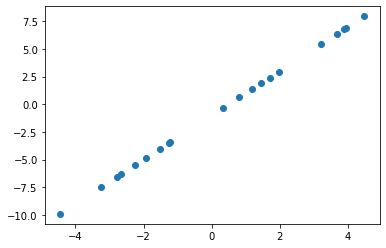

In [4]:
plt.scatter(X, Y)

In [5]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

# Model, Loss, and Optimizer

In [6]:
model = nn.Linear(1, 1)

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training

In [8]:
n_epochs = 15
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f'Epoch {it + 1}/{n_epochs}, Loss:{loss.item():.4f}')

Epoch 1/15, Loss:7.5833
Epoch 2/15, Loss:1.7031
Epoch 3/15, Loss:0.4523
Epoch 4/15, Loss:0.1607
Epoch 5/15, Loss:0.0770
Epoch 6/15, Loss:0.0442
Epoch 7/15, Loss:0.0274
Epoch 8/15, Loss:0.0174
Epoch 9/15, Loss:0.0111
Epoch 10/15, Loss:0.0072
Epoch 11/15, Loss:0.0046
Epoch 12/15, Loss:0.0030
Epoch 13/15, Loss:0.0019
Epoch 14/15, Loss:0.0012
Epoch 15/15, Loss:0.0008


# Plot Loss and Data

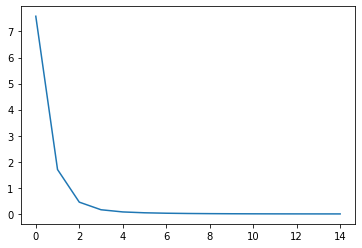

In [9]:
plt.plot(losses)

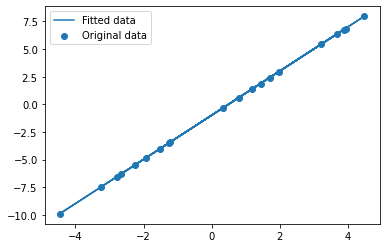

In [10]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted data')
plt.legend()
plt.show()

# Weight and Bias

In [11]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[1.9990373]] [-0.97732174]


# Save and Load the Model

In [12]:
model.state_dict()

OrderedDict([('weight', tensor([[1.9990]])), ('bias', tensor([-0.9773]))])

In [14]:
torch.save(model.state_dict(), 'model.pt')

In [15]:
model2 = nn.Linear(1, 1)

In [16]:
model2.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [17]:
from google.colab import files
files.download('model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>